In [3]:
from scipy.io import loadmat
import os

In [4]:
data_mat = loadmat("emnist-balanced.mat")

In [5]:
data_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dataset'])

In [6]:
data = data_mat['dataset']

In [7]:
x_train = data['train'][0, 0]['images'][0, 0]
y_train = data['train'][0, 0]['labels'][0, 0]
x_test = data['test'][0, 0]['images'][0, 0]
y_test = data['test'][0, 0]['labels'][0, 0]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
          'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
          's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# reshape into 28x28 later 

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112800, 784), (112800, 1), (18800, 784), (18800, 1))

[33]


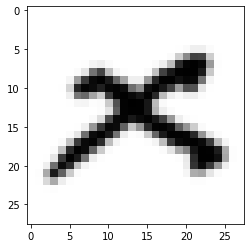

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 546 

plt.imshow(x_train[idx].reshape(28, 28), cmap = 'Greys')
print(y_train[idx])

In [101]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255 
x_train.shape[0]

112800

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [103]:
emnist_model = Sequential()
emnist_model.add(Conv2D(28, kernel_size=(3, 3), input_shape=shape))
emnist_model.add(MaxPooling2D(pool_size=(2, 2)))
emnist_model.add(Dropout(0.4))
emnist_model.add(Conv2D(28, kernel_size=(3, 3), input_shape=shape))
emnist_model.add(MaxPooling2D(pool_size=(2, 2)))
emnist_model.add(Dropout(0.1))
emnist_model.add(Flatten())
emnist_model.add(Dense(200, activation=tf.nn.relu))
emnist_model.add(Dropout(0.2))
emnist_model.add(Dense(59, activation=tf.nn.softmax))

In [104]:
emnist_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
emnist_model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
112800/112800 [==============================] - 285s 3ms/step - loss: 0.8389 - accuracy: 0.7397
Epoch 2/10
112800/112800 [==============================] - 206s 2ms/step - loss: 0.5079 - accuracy: 0.8284
Epoch 3/10
112800/112800 [==============================] - 208s 2ms/step - loss: 0.4588 - accuracy: 0.8419
Epoch 4/10
112800/112800 [==============================] - 209s 2ms/step - loss: 0.4344 - accuracy: 0.8487
Epoch 5/10
112800/112800 [==============================] - 210s 2ms/step - loss: 0.4153 - accuracy: 0.8528
Epoch 6/10
112800/112800 [==============================] - 211s 2ms/step - loss: 0.4022 - accuracy: 0.85651s - loss: 0 - ETA
Epoch 7/10
112800/112800 [==============================] - 211s 2ms/step - loss: 0.3899 - accuracy: 0.8607
Epoch 8/10
112800/112800 [==============================] - 211s 2ms/step - loss: 0.3814 - accuracy: 0.8627
Epoch 9/10
112800/112800 [==============================] - 211s 2ms/step - loss: 0.3743 - accuracy: 0.8647
Epoch 10/1

In [21]:
emnist_model = tf.keras.models.load_model('nn_emnist')
pred = emnist_model.predict(x_test[809].reshape(1, 28, 28, 1))
print(x_test[809].shape)
print(labels[pred.argmax()])

(784,)
Q


Q


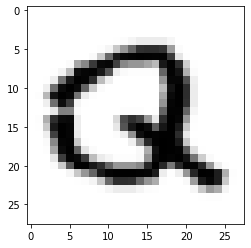

In [22]:
plt.imshow(x_test[809].reshape(28, 28), cmap='Greys')
print(labels[y_test[809][0]])

In [115]:
emnist_model.save('nn_emnist')